<center><strong><h1>UAS</h1></strong></center>
<p style="margin-left:31.5%;font-size:20px;font-weight:600;color:blue;">KAPITA SELEKTA KOMPUTASI</p>
<p style="margin-left:30%;font-size:20px;font-weight:600;">Maftuh Mashuri (11160940000076)</p>

# Import Modul Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('bmh'); sns.set()

## Deskripsi Data
### Data yang saya gunakan adalah data kecelakan di United States pada bulan Maret 2019 yang berisi 69.381 catatan kecelakan.
### Data ini sudah saya filter dari dataset https://www.kaggle.com/sobhanmoosavi/us-accidents. Dimana dataset tersebut berisi data kecelekaan sebanyak 2.25 juta catatan dari tahun 2016 sampai 2019.
### Data ini berisi 49 variabel yang nantinya akan saya seleksi lagi menjadi beberapa variabel yang berguna.

1. ID: Pengidentifikasi unik dari catatan kecelakaan.
2. Source: Menunjukkan sumber laporan kecelakaan (yaitu API yang melaporkan kecelakaan itu).
3. TMC: Kecelakaan lalu lintas mungkin memiliki kode Traffic Message Channel (TMC) yang memberikan deskripsi lebih rinci tentang peristiwa tersebut.
4. Severity: Menunjukkan tingkat keparahan kecelakaan, angka antara 1 dan 4, di mana 1 menunjukkan dampak paling kecil pada lalu lintas (yaitu, keterlambatan singkat sebagai akibat kecelakaan) dan 4 menunjukkan dampak signifikan pada lalu lintas (yaitu, penundaan lama) .
5. Start_Time: Menunjukkan waktu mulai dari kecelakaan di zona waktu lokal.
6. End_Time: Menunjukkan waktu akhir dari kecelakaan di zona waktu lokal.
7. Start_Lat: Menunjukkan lintang dalam koordinat GPS dari titik awal.
8. Start_Lng: Menunjukkan garis bujur dalam koordinat GPS dari titik awal.
9. End_Lat: Menunjukkan lintang dalam koordinat GPS titik akhir.
10. End_Lng: Menunjukkan garis bujur dalam koordinat GPS titik akhir.
11. Distance(mi): Panjangnya jalan dipengaruhi oleh kecelakaan.
12. Description: Menunjukkan deskripsi bahasa alami dari kecelakaan.
13. Number: Menunjukkan nomor jalan di bidang alamat.
14. Street: Menampilkan nama jalan di bidang alamat.
15. Side: Menunjukkan sisi relatif jalan (Kanan / Kiri) di bidang alamat.
16. City: Menunjukkan kota di bidang alamat.
17. County: Menampilkan daerah dalam bidang alamat.
18. State: Menunjukkan negara bagian di bidang alamat.
19. Zipcode: Menunjukkan kode pos di bidang alamat.
20. Country: Menunjukkan negara di bidang alamat.
21. Timezone: Menampilkan zona waktu berdasarkan lokasi kecelakaan (timur, tengah, dll.).
22. Airport_Code: Menunjukkan stasiun cuaca berbasis bandara yang paling dekat dengan lokasi kecelakaan.
23. Weather_Times: Menunjukkan cap waktu dari catatan pengamatan cuaca (dalam waktu lokal).
24. Temperature (F): Menunjukkan suhu (dalam Fahrenheit).
25. Wind_Chill (P): Menunjukkan angin dingin (di Fahrenheit).
26. Humidity(%): Menunjukkan kelembaban (dalam persentase).
27. Pressure(in): Menunjukkan tekanan udara (dalam inci).
28. Visibility(mi): Menunjukkan jarak pandang (dalam mil).
29. Wind_Direction: Menunjukkan arah angin.
30. Wind_Speed(mph): Menunjukkan kecepatan angin (dalam mil per jam).
31. Precipitation(in): Menunjukkan jumlah curah hujan dalam inci, jika ada.
32. Weather_Condition: Menunjukkan kondisi cuaca (hujan, salju, badai, kabut, dll)
33. Amenity: Sebuah penjelasan POI yang menunjukkan adanya kemudahan evakuasi di lokasi terdekat.
34. Bump: Anotasi POI yang menunjukkan adanya polisi tidur di lokasi terdekat.
35. Crossing: Sebuah penjelasan POI yang menunjukkan adanya perempatan di lokasi terdekat.
36. Give_Way: Penjelasan POI yang menunjukkan keberadaan give_way di lokasi terdekat.
37. Junction: Sebuah penjelasan POI yang menunjukkan adanya persimpangan di lokasi terdekat.
38. No_Exit: Anotasi POI yang menunjukkan keberadaan no exit di lokasi terdekat.
39. Railway: Penjelasan POI yang menunjukkan keberadaan jalur kereta api di lokasi terdekat.
40. Roundabout: Sebuah penjelasan POI yang menunjukkan keberadaan bundaran di lokasi terdekat.
41. Station: Penjelasan POI yang menunjukkan keberadaan stasiun di lokasi terdekat.
42. Stop: Sebuah penjelasan POI yang menunjukkan adanya pemberhentian di lokasi terdekat.
43. Traffic_Calming: Anotasi POI yang menunjukkan keberadaan traffic calming di lokasi terdekat.
44. Traffic_Signal: Anotasi POI yang menunjukkan keberadaan lampu merah di lokasi terdekat.
45. Turning_Loop: Anotasi POI yang menunjukkan keberadaan turning loop di lokasi terdekat.
46. Sunrise_Sunset: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan matahari terbit / terbenam.
47. Civil_Twilight: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan pada twilight sipil.
48. Nautical_Twilight: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan pada senja bahari.
49. Astronomical_Twilight: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan pada senja astronomi.

# Hipotesis Awal
- Terdapat jalan, kota, daerah, negara bagian, dan negara tertentu yang sering terjadi kecelakaan
- Tingkat keparahan kecelakaan dipengaruhi oleh:
    * angin dingin,
    * kelembaban,
    * tekanan udara,
    * jarak pandangan,
    * arah angin,
    * kecepatan angin,
    * curah hujan,
    * kondisi cuaca
- Tingkat keparahan kecelakaan dipengaruhi oleh infrastukur jalan seperti:
    * polisi tidur
    * perempatan
    * persimpangan
    * bundaran
    * trafic calming
    * lampu merah
- Tingkat keparahan kecelakaan dipengaruhi oleh waktu (siang atau malam)

In [41]:
data = pd.read_csv('US_Accidents_march2019.csv')

In [42]:
State_dic = {'NY' : 'New York', 'PA' : 'Pennsylvania', 'RI' : 'Rhode Island', 'NH' : 'New Hampshire', 'MI' : 'Michigan', 'CT' : 'Connecticut', 'NJ' : 'New Jersey', 'MD' : 'Maryland', 'VA' : 'Virginia', 'DC' : 'District of Columbia', 'IN' : 'Indiana', 'KY' : 'Kentucky', 'OH' : 'Ohio', 'TN' : 'Tennessee', 'NC' : 'North Carolina', 'FL' : 'Florida', 'GA' : 'Georgia', 'SC' : 'South Carolina', 'AL' : 'Alabama', 'MO' : 'Missouri', 'MN' : 'Minnesota', 'KS' : 'Kansas', 'IL' : 'Illinois', 'IA' : 'Iowa', 'WI' : 'Wisconsin', 'TX' : 'Texas', 'OK' : 'Oklahoma', 'LA' : 'Louisiana', 'CO' : 'Colorado', 'UT' : 'Utah', 'AZ' : 'Arizona', 'NM' : 'New Mexico', 'OR' : 'Oregon', 'WA' : 'Washington', 'NV' : 'Nevada', 'CA' : 'California', 'MA' : 'Massachusetts', 'VT' : 'Vermont', 'DE' : 'Delaware', 'NE' : 'Nebraska', 'MS' : 'Mississippi', 'AR' : 'Arkansas', 'MT' : 'Montana', 'WV' : 'West Virginia', 'ME' : 'Maine', 'WY' : 'Wyoming', 'ID' : 'Idaho', 'ND' : 'North Dakota', 'SD' : 'South Dakota'}

In [43]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
data.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-512230,MapQuest,201.0,3,2019-03-03 09:53:41,2019-03-03 10:22:21,42.338089,-79.586700,NaN,NaN,0.0,Accident on I-90 Westbound after Exit 60 NY-39...,NaN,I-90 W,R,Westfield,Chautauqua,NY,14787,US,US/Eastern,KDKK,2019-03-03 09:53:00,26.1,21.9,66.0,30.19,10.0,WSW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,1,A-512231,MapQuest,201.0,3,2019-03-03 15:25:49,2019-03-03 15:55:22,42.743877,-78.845070,NaN,NaN,0.0,Accident on I-90 Westbound at Exit 57 NY-75 Ca...,NaN,I-90 W,R,Hamburg,Erie,NY,14075,US,US/Eastern,KBUF,2019-03-03 15:54:00,28.0,21.7,61.0,30.03,10.0,WSW,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,2,A-512232,MapQuest,201.0,3,2019-03-03 17:36:46,2019-03-03 18:06:29,43.004314,-78.946648,NaN,NaN,0.0,Accident on I-190 Northbound at Exits 18 18A 1...,NaN,I-190 N,R,Grand Island,Erie,NY,14072,US,US/Eastern,KIAG,2019-03-03 17:53:00,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,3,A-512233,MapQuest,201.0,3,2019-03-03 17:48:42,2019-03-03 18:18:20,43.074436,-78.990921,NaN,NaN,0.0,Accident on I-190 Southbound at Exits 21 21A N...,NaN,I-190 S,R,Niagara Falls,Niagara,NY,14304,US,US/Eastern,KIAG,2019-03-03 17:53:00,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,4,A-512234,MapQuest,247.0,2,2019-03-03 17:54:31,2019-03-03 18:24:07,41.946899,-78.672333,NaN,NaN,0.0,Delays due to accident on PA-346 Washington St...,451.0,W Washington St,R,Bradford,McKean,PA,16701-2860,US,US/Eastern,KBFD,2019-03-03 17:53:00,24.1,17.0,88.0,29.95,0.5,NNW,5.8,0.02,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [53]:
# Ukuran Data
jumlah_baris, jumlah_kolom = data.shape
print('baris = ', jumlah_baris, ', Kolom = ', jumlah_kolom)

data.info()

baris =  69381 , Kolom =  31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69381 entries, 0 to 69380
Data columns (total 31 columns):
Severity             69381 non-null category
Start_Time           69381 non-null datetime64[ns]
End_Time             69381 non-null datetime64[ns]
Distance(mi)         69381 non-null float64
Street               69381 non-null object
Side                 69381 non-null category
City                 69380 non-null object
County               69381 non-null object
State                69381 non-null object
Temperature(F)       67578 non-null float64
Wind_Chill(F)        21881 non-null float64
Humidity(%)          67519 non-null float64
Pressure(in)         67744 non-null float64
Visibility(mi)       67307 non-null float64
Wind_Direction       67966 non-null object
Wind_Speed(mph)      56111 non-null float64
Precipitation(in)    8243 non-null float64
Weather_Condition    67280 non-null object
Amenity              69381 non-null category
Bump            

In [128]:
for key, value in State_dic.items():
    data['State'][data[data['State'] == key].index] = value

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Feature Selection
### Drop kolom-kolom yang tidak berguna/berpengaruh


In [45]:
column_drop = ['Unnamed: 0', "ID", "Source", "TMC", 
               "Start_Lat", "Start_Lng", "End_Lat", "End_Lng",
               "Description", "Number", "Zipcode", "Country",
               "Timezone", "Airport_Code", "Weather_Timestamp", 
               'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
data.drop(column_drop, axis=1, inplace=True)
data.dtypes

Severity               int64
Start_Time            object
End_Time              object
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
dtype: object

In [46]:
data.head()

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,2019-03-03 09:53:41,2019-03-03 10:22:21,0.0,I-90 W,R,Westfield,Chautauqua,NY,26.1,21.9,66.0,30.19,10.0,WSW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3,2019-03-03 15:25:49,2019-03-03 15:55:22,0.0,I-90 W,R,Hamburg,Erie,NY,28.0,21.7,61.0,30.03,10.0,WSW,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,2019-03-03 17:36:46,2019-03-03 18:06:29,0.0,I-190 N,R,Grand Island,Erie,NY,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,2019-03-03 17:48:42,2019-03-03 18:18:20,0.0,I-190 S,R,Niagara Falls,Niagara,NY,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,2019-03-03 17:54:31,2019-03-03 18:24:07,0.0,W Washington St,R,Bradford,McKean,PA,24.1,17.0,88.0,29.95,0.5,NNW,5.8,0.02,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False


### Mengubah tipe data

In [47]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])
data[['Severity', 'Side']] = data[['Severity', 'Side']].astype('category')
data.dtypes

Severity                   category
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Street                       object
Side                       category
City                         object
County                       object
State                        object
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               object
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            object
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                       bool
No_Exit                        bool
Railway                        bool
Roundabout                     bool
Station                        bool
Stop                        

In [48]:
weather_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
               'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
               'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
for column in weather_columns:    
    data[column][data[data[column] == False].index] = 0
    data[column][data[data[column] == True].index] = 1

data[to_category] = data[to_category].astype('category')
data.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Severity                   category
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Street                       object
Side                       category
City                         object
County                       object
State                        object
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               object
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            object
Amenity                    category
Bump                       category
Crossing                   category
Give_Way                   category
Junction                   category
No_Exit                    category
Railway                    category
Roundabout                 category
Station                    category
Stop                       c

In [49]:
data.head()

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,2019-03-03 09:53:41,2019-03-03 10:22:21,0.0,I-90 W,R,Westfield,Chautauqua,NY,26.1,21.9,66.0,30.19,10.0,WSW,3.5,NaN,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2019-03-03 15:25:49,2019-03-03 15:55:22,0.0,I-90 W,R,Hamburg,Erie,NY,28.0,21.7,61.0,30.03,10.0,WSW,5.8,NaN,Overcast,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2019-03-03 17:36:46,2019-03-03 18:06:29,0.0,I-190 N,R,Grand Island,Erie,NY,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2019-03-03 17:48:42,2019-03-03 18:18:20,0.0,I-190 S,R,Niagara Falls,Niagara,NY,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2019-03-03 17:54:31,2019-03-03 18:24:07,0.0,W Washington St,R,Bradford,McKean,PA,24.1,17.0,88.0,29.95,0.5,NNW,5.8,0.02,Snow,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cek Missing Value

In [52]:
data.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Distance(mi)             0
Street                   0
Side                     0
City                     1
County                   0
State                    0
Temperature(F)        1803
Wind_Chill(F)        47500
Humidity(%)           1862
Pressure(in)          1637
Visibility(mi)        2074
Wind_Direction        1415
Wind_Speed(mph)      13270
Precipitation(in)    61138
Weather_Condition     2101
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
dtype: int64

Dari data diatas untuk semua variabel cuaca(Temperature, Wind_Chill, dll) terdapat missing value. Namun variabel yang memiliki missing value >= 50% adalah Wind_Chill dan Precipitation, maka untuk kedua variabel ini lebih baik tidak digunakan dan variabel yang <= 50% akan dihilangkan perbarisnya atau dimanipulasi

In [54]:
for column in data:
    if data[column].isnull().sum() > 0.5 * jumlah_baris:
        data.drop(column, axis=1, inplace=True)

In [55]:
data.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Distance(mi)             0
Street                   0
Side                     0
City                     1
County                   0
State                    0
Temperature(F)        1803
Humidity(%)           1862
Pressure(in)          1637
Visibility(mi)        2074
Wind_Direction        1415
Wind_Speed(mph)      13270
Weather_Condition     2101
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
dtype: int64

Untuk mengatasi missing value yang di bawah 50% maka saya akan menghapus semua baris yang mengandung missing value. namun tindakan ini akan menghapus baris pada variabel2 lain. maka saya akan membagi datanya menjadi 3 bagian

### Membagi data menjadi 3 bagian berdasarkan:
    - lokasi (jarak dampak kecelakaan, nama jalan, kota, negara bagian)
    - cuaca (temperatur, kelembaban, dll)
    - infrastruktur jalan (kemudahan akses, polisi tidur, dll)

In [56]:
data_lokasi = data[['Severity', 'Distance(mi)', 'Street', 'City', 'County', 'State']]
data_cuaca = data[['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                          'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']]
data_infrastruktur = data[['Severity', 'Street', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                                  'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                                  'Traffic_Signal', 'Turning_Loop']]

### Data lokasi
#### Melihat data lokasi

In [58]:
data_lokasi.sample(5)

,Severity,Distance(mi),Street,City,County,State
42754,2,0.000,Peoria St,Aurora,Arapahoe,CO
58755,2,0.376,I-5 S,Tacoma,Pierce,WA
19309,2,0.000,4S1 Warren Ave,Warrenville,DuPage,IL
54840,3,0.064,I-70 W,Denver,Denver,CO
63864,2,0.208,I-10 W,Alhambra,Los Angeles,CA


#### Gambaran umum data lokasi

In [59]:
data_lokasi.describe(include='all')

,Severity,Distance(mi),Street,City,County,State
count,69381.0,69381.000000,69381,69380,69381,69381
unique,4.0,NaN,19838,4732,1021,49
top,2.0,NaN,I-5 N,Charlotte,Los Angeles,CA
freq,47051.0,NaN,807,1929,4030,11648
mean,NaN,0.373003,NaN,NaN,NaN,NaN
std,NaN,2.090839,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN
75%,NaN,0.030000,NaN,NaN,NaN,NaN


Dilihat dari tabel diatas tempat yang paling sering terjadi kecelakan adalah di jalan I-5 N di daerah Los Angeles 

#### Melihat missing value

In [60]:
data_lokasi.isnull().sum()

Severity        0
Distance(mi)    0
Street          0
City            1
County          0
State           0
dtype: int64

Dilihat dari data diatas terdapat 1 missing value di variabel City(kota).
Karena yang terdapat missing value hanya satu data, menghilangkannya tidak akan berpengaruh signifikan

In [61]:
data_lokasi = data_lokasi.dropna()

In [62]:
data_lokasi.isnull().sum()

Severity        0
Distance(mi)    0
Street          0
City            0
County          0
State           0
dtype: int64

### Data cuaca
#### Melihat data cuaca

In [63]:
data_cuaca.sample(5)

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
49286,3,69.1,57.0,30.03,10.0,West,9.2,Overcast
585,3,57.0,87.0,30.12,10.0,SW,4.6,Overcast
3869,2,46.9,16.0,30.00,10.0,WNW,10.4,Clear
40790,2,55.0,86.0,30.02,10.0,West,8.1,Light Rain
29185,2,64.0,38.0,30.30,10.0,SE,8.1,Mostly Cloudy


#### Melihat missing value

In [67]:
data_cuaca.isnull().sum()

Severity                 0
Temperature(F)        1803
Humidity(%)           1862
Pressure(in)          1637
Visibility(mi)        2074
Wind_Direction        1415
Wind_Speed(mph)      13270
Weather_Condition     2101
dtype: int64

#### Mengatasi missing value
Karena data cuaca adalah data Time Series (artinya data yang bergantung pada waktu) dan dataset ini hanya menggunakan satu waktu saja yaitu bulan maret 2019, maka tidak bisa kita memanipulasinya dengan statistika deskriptif(mean, modus dll) atau pun dengan metode seasonal adjusment + interpolation.
Tindakan yang paling memungkinkan adalah menghapus baris yang mengandung missing value

In [68]:
data_cuaca = data_cuaca.dropna()

In [70]:
print(data_cuaca.isnull().sum())
print(data_cuaca.info())

Severity             0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55596 entries, 0 to 69380
Data columns (total 8 columns):
Severity             55596 non-null category
Temperature(F)       55596 non-null float64
Humidity(%)          55596 non-null float64
Pressure(in)         55596 non-null float64
Visibility(mi)       55596 non-null float64
Wind_Direction       55596 non-null object
Wind_Speed(mph)      55596 non-null float64
Weather_Condition    55596 non-null object
dtypes: category(1), float64(5), object(2)
memory usage: 3.4+ MB
None


In [71]:
data_cuaca.describe(include='all')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
count,55596.0,55596.000000,55596.000000,55596.000000,55596.000000,55596,55596.000000,55596
unique,4.0,NaN,NaN,NaN,NaN,17,NaN,38
top,2.0,NaN,NaN,NaN,NaN,South,NaN,Clear
freq,37595.0,NaN,NaN,NaN,NaN,5203,NaN,18643
mean,NaN,50.486621,60.578207,30.103870,9.204659,NaN,9.266050,NaN
std,NaN,16.083147,22.668236,0.243835,2.701135,NaN,4.800763,NaN
min,NaN,-16.200000,4.000000,0.000000,0.000000,NaN,1.200000,NaN
25%,NaN,39.900000,43.000000,29.990000,10.000000,NaN,5.800000,NaN
50%,NaN,52.000000,61.000000,30.110000,10.000000,NaN,8.100000,NaN
75%,NaN,62.100000,80.000000,30.250000,10.000000,NaN,11.500000,NaN


## Visualisasi data Kategori

In [158]:
Severity = data['Severity'].value_counts()
Severity = Severity.to_dict()
Severity

{2: 47051, 3: 19823, 4: 2492, 1: 15}

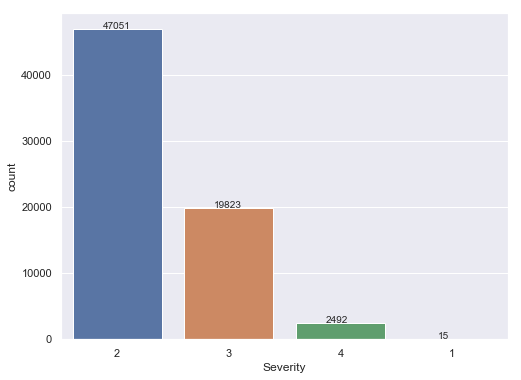

In [29]:
plt.figure(figsize=(8, 6))
col = 'Severity'
ax = sns.countplot(x=col, data=data, order = data[col].value_counts().index)
for p, label in zip(ax.patches, data[col].value_counts().values):
    ax.annotate(label, (p.get_x()+0.27, p.get_height()+0.15))

In [166]:
Street = data['Street'].value_counts()[:10]
Street = Street.to_dict()
Street

{'I-5 N': 807,
 'I-95 N': 761,
 'I-95 S': 712,
 'I-10 W': 585,
 'I-5 S': 559,
 'I-10 E': 418,
 'I-80 W': 381,
 'I-80 E': 346,
 'I-405 N': 344,
 'I-15 N': 344}

In [ ]:
plt.figure(figsize=(8, 6))
col = 'Street'
ax = sns.countplot(x=col, data=data, order = data[col].value_counts().index)
for p, label in zip(ax.patches, data[col].value_counts().values):
    ax.annotate(label, (p.get_x()+0.27, p.get_height()+0.15))

In [91]:
data['Date'] = data['Start_Time'].dt.day

In [110]:
data.groupby(["Severity", "Date"]).size().unstack()

Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Severity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,1.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN
2,2161.0,412.0,304.0,2104.0,2234.0,2224.0,2166.0,2115.0,482.0,458.0,1740.0,2061.0,2024.0,1788.0,1748.0,435.0,322.0,1845.0,2029.0,2254.0,2116.0,2102.0,536.0,438.0,1870.0,2064.0,2149.0,2034.0,1985.0,508.0,343.0
3,992.0,351.0,489.0,681.0,812.0,854.0,780.0,865.0,477.0,435.0,603.0,637.0,723.0,715.0,793.0,425.0,401.0,638.0,671.0,750.0,746.0,762.0,479.0,393.0,675.0,673.0,680.0,715.0,720.0,508.0,380.0
4,91.0,52.0,115.0,88.0,95.0,81.0,68.0,86.0,79.0,62.0,108.0,76.0,93.0,83.0,103.0,63.0,64.0,98.0,105.0,84.0,64.0,80.0,54.0,53.0,78.0,93.0,94.0,66.0,89.0,63.0,64.0


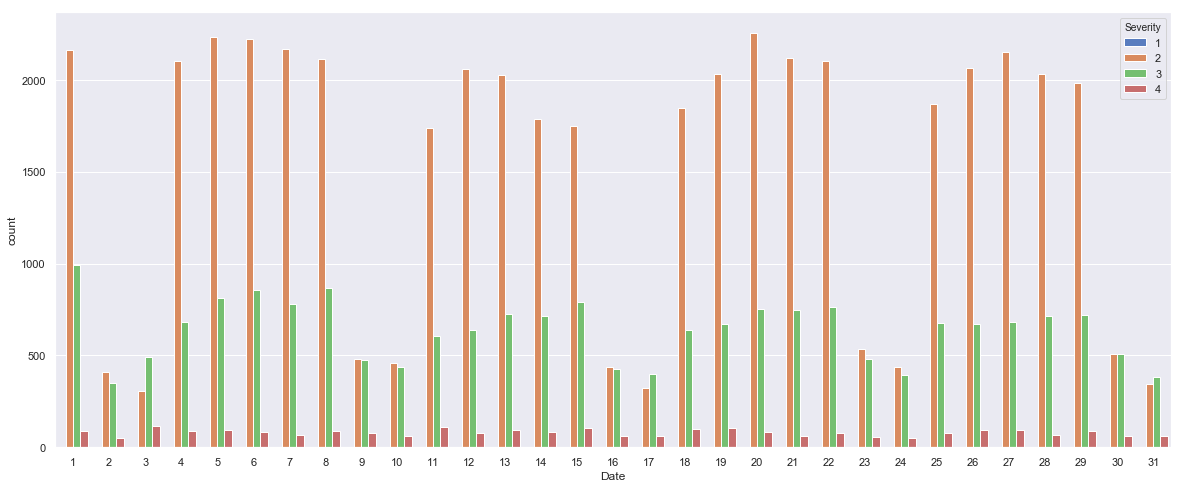

In [151]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x = 'Date', hue = 'Severity', palette = 'muted', data=data)

In [125]:
data.groupby(["Severity", "State"]).size().unstack()

State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Severity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1259.0,31.0,1429.0,7337.0,551.0,246.0,132.0,65.0,2926.0,950.0,53.0,28.0,974.0,249.0,61.0,216.0,1309.0,426.0,684.0,52.0,839.0,932.0,335.0,100.0,9.0,3622.0,1.0,332.0,156.0,761.0,79.0,165.0,2168.0,612.0,1592.0,2985.0,1107.0,128.0,3344.0,NaN,1140.0,3747.0,1481.0,1423.0,14.0,641.0,346.0,13.0,1.0
3,530.0,9.0,334.0,4140.0,643.0,187.0,11.0,3.0,1535.0,883.0,94.0,NaN,456.0,178.0,85.0,238.0,319.0,267.0,293.0,4.0,505.0,855.0,415.0,72.0,6.0,512.0,NaN,68.0,38.0,312.0,54.0,42.0,1078.0,269.0,123.0,192.0,436.0,113.0,777.0,NaN,492.0,1653.0,321.0,718.0,3.0,434.0,119.0,4.0,3.0
4,17.0,25.0,62.0,170.0,135.0,27.0,9.0,9.0,269.0,205.0,8.0,NaN,88.0,58.0,9.0,5.0,21.0,7.0,99.0,1.0,126.0,5.0,41.0,3.0,2.0,51.0,2.0,9.0,2.0,58.0,12.0,6.0,109.0,67.0,1.0,87.0,161.0,2.0,17.0,7.0,18.0,95.0,125.0,124.0,NaN,83.0,44.0,10.0,1.0


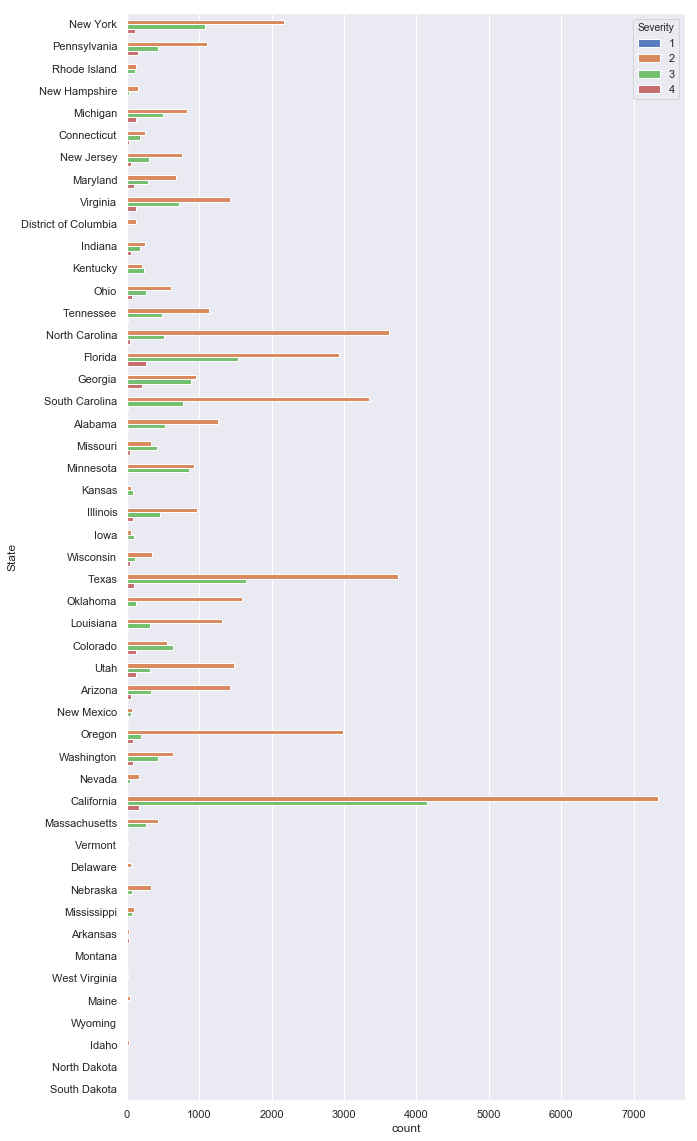

In [157]:
plt.figure(figsize=(10,20))
ax = sns.countplot(y = 'State', hue = 'Severity', palette = 'muted', data=data)

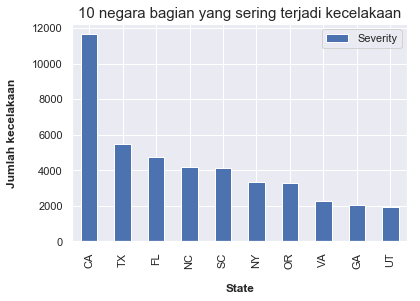

In [118]:
# jumlah_kecelakaan = data_lokasi.groupby(['State']).count()
grouped = data_lokasi.groupby(['State']).count().reset_index()
grouped = grouped.sort_values('Severity', ascending=False).head(10)

plot = grouped.plot(kind='bar', x='State', y='Severity')
plot.set_title('10 negara bagian yang sering terjadi kecelakaan', fontsize=15)
plot.set_xlabel('State', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah kecelakaan', weight='bold', labelpad=15)

plot.tick_params(axis='x', pad=5)


In [71]:
data_lokasi.groupby(['Severity']).count()

,Distance(mi),Street,City,County,State
Severity,,,,,
0,0,0,0,0,0
1,14,14,14,14,14
2,47050,47050,47050,47050,47050
3,19823,19823,19823,19823,19823
4,2492,2492,2492,2492,2492


In [27]:
data_cuaca.sample(10)

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
10585,3,39.0,35.7,36.0,30.36,10.0,South,4.6,NaN,Overcast
7638,2,66.9,NaN,61.0,29.80,10.0,South,17.3,0.0,Mostly Cloudy
5902,2,23.0,12.4,50.0,30.40,10.0,West,10.4,NaN,Scattered Clouds
67556,2,41.2,36.0,62.0,30.18,10.0,West,8.1,NaN,Scattered Clouds
23992,2,57.9,NaN,45.0,30.14,9.0,WNW,15.0,NaN,Clear
17093,2,41.0,35.2,100.0,29.83,0.1,SE,9.2,NaN,Fog
14057,2,48.9,NaN,80.0,29.99,10.0,SE,13.8,NaN,Scattered Clouds
3125,2,24.8,NaN,44.0,30.11,10.0,Calm,NaN,NaN,Clear
34789,2,50.0,NaN,89.0,30.08,10.0,NNW,3.5,NaN,Overcast
25115,3,61.0,NaN,60.0,30.16,10.0,WSW,6.9,NaN,Partly Cloudy


In [28]:
data_infrastruktur.sample(10)

,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
27852,2,False,False,False,False,False,False,False,False,False,False,False,True,False
34358,2,False,False,False,False,False,False,False,False,False,False,False,False,False
4177,2,False,False,False,False,False,False,False,False,False,False,False,False,False
64285,2,False,False,False,False,False,False,False,False,False,False,False,False,False
15951,2,False,False,False,False,False,False,False,False,False,False,False,False,False
5867,2,False,False,False,False,False,False,False,False,False,False,False,False,False
39559,2,False,False,False,False,False,False,False,False,False,False,False,True,False
51244,3,False,False,False,False,False,False,False,False,False,False,False,False,False
30289,2,False,False,False,False,False,False,False,False,False,False,False,False,False
39765,3,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Statistika Sederhana dari data "Numerik"-nya
data.describe(include='all')

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,2019-03-03 09:53:41,2019-03-03 10:22:21,0.0,I-90 W,R,Westfield,Chautauqua,NY,26.1,...,False,False,False,False,False,False,False,False,False,False
1,3,2019-03-03 15:25:49,2019-03-03 15:55:22,0.0,I-90 W,R,Hamburg,Erie,NY,28.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2019-03-03 17:36:46,2019-03-03 18:06:29,0.0,I-190 N,R,Grand Island,Erie,NY,25.0,...,False,False,False,False,False,False,False,False,False,False
3,3,2019-03-03 17:48:42,2019-03-03 18:18:20,0.0,I-190 S,R,Niagara Falls,Niagara,NY,25.0,...,False,False,False,False,False,False,False,False,False,False
4,2,2019-03-03 17:54:31,2019-03-03 18:24:07,0.0,W Washington St,R,Bradford,McKean,PA,24.1,...,False,False,False,False,False,False,False,False,False,False
5,3,2019-03-03 18:37:46,2019-03-03 19:07:21,0.0,I-90 E,R,Dunkirk,Chautauqua,NY,21.9,...,False,False,False,False,False,False,False,False,False,False
6,3,2019-03-03 19:04:40,2019-03-03 19:34:15,0.0,I-190 N,R,Buffalo,Erie,NY,23.0,...,False,False,False,False,False,False,False,False,False,False
7,2,2019-03-03 07:27:28,2019-03-03 07:56:31,0.0,RI-10 S,R,Providence,Providence,RI,33.1,...,False,False,False,False,False,False,False,False,False,False
8,3,2019-03-03 07:37:18,2019-03-03 08:06:34,0.0,US-1 Alt N,R,East Providence,Providence,RI,33.1,...,False,True,False,False,False,False,False,False,False,False
9,2,2019-03-03 13:09:12,2019-03-03 13:38:35,0.0,RI-10 N,R,Providence,Providence,RI,39.9,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Memilih hanya variable dengan tipe tertentu
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.0,26.1,21.9,66.0,30.19,10.0,3.5,NaN
1,0.0,28.0,21.7,61.0,30.03,10.0,5.8,NaN
2,0.0,25.0,16.3,75.0,30.04,2.5,8.1,0.00
3,0.0,25.0,16.3,75.0,30.04,2.5,8.1,0.00
4,0.0,24.1,17.0,88.0,29.95,0.5,5.8,0.02


In [14]:
# Memilih hanya variable dengan tipe tertentu
data_obj = data.select_dtypes(include = ['category'])
data_obj.head()

,Severity
0,3
1,3
2,3
3,3
4,2


In [15]:
# Memilih hanya variable dengan tipe tertentu
data_obj = data.select_dtypes(include = ['object'])
data_obj.head()

,Street,Side,City,County,State,Wind_Direction,Weather_Condition
0,I-90 W,R,Westfield,Chautauqua,NY,WSW,Mostly Cloudy
1,I-90 W,R,Hamburg,Erie,NY,WSW,Overcast
2,I-190 N,R,Grand Island,Erie,NY,SSW,Light Snow
3,I-190 S,R,Niagara Falls,Niagara,NY,SSW,Light Snow
4,W Washington St,R,Bradford,McKean,PA,NNW,Snow


In [16]:
data['date'] = data['Start_Time'].dt.day

In [18]:
data.sample(10)

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,date
53759,3,2019-03-01 08:30:04,2019-03-01 08:59:48,0.000,W Mercer Way,R,Mercer Island,King,WA,39.9,NaN,68.0,30.16,10.0,Calm,NaN,NaN,Clear,1
42796,3,2019-03-26 04:57:49,2019-03-26 05:41:52,0.000,I-10 E,R,Phoenix,Maricopa,AZ,55.4,NaN,44.0,29.96,10.0,North,NaN,NaN,Scattered Clouds,26
55499,4,2019-03-05 01:33:06,2019-03-05 06:32:30,8.053,Zion Park Blvd,R,Hurricane,Washington,UT,46.0,44.8,79.0,30.08,10.0,SSW,3.5,NaN,Clear,5
36093,3,2019-03-22 15:40:13,2019-03-22 16:25:00,0.000,Highway 187,R,Anderson,Anderson,SC,69.1,NaN,18.0,29.86,10.0,WSW,19.6,NaN,Clear,22
16736,2,2019-03-12 07:49:41,2019-03-12 08:48:43,0.000,University Pkwy,R,Sarasota,Sarasota,FL,63.0,NaN,100.0,30.14,10.0,Calm,NaN,NaN,Clear,12
34795,2,2019-03-21 17:14:47,2019-03-21 18:17:19,0.000,Tanglewood Dr,R,Santa Maria,Santa Barbara,CA,60.1,NaN,69.0,30.11,9.0,WSW,8.1,NaN,Scattered Clouds,21
10301,3,2019-03-07 13:59:25,2019-03-07 14:29:09,0.000,I-10 W,R,Ontario,San Bernardino,CA,66.0,NaN,48.0,29.96,10.0,SW,11.5,NaN,Mostly Cloudy,7
28624,2,2019-03-19 12:28:01,2019-03-19 16:44:41,0.070,College Club Dr,R,Fort Myers,Lee,FL,62.1,NaN,90.0,30.08,10.0,NE,11.5,0.0,Light Rain,19
19176,2,2019-03-13 08:49:26,2019-03-13 09:49:03,0.000,Riverview Dr,R,Green Bay,Brown,WI,37.4,32.8,93.0,29.85,0.5,South,5.8,NaN,Fog,13
31725,2,2019-03-20 18:11:57,2019-03-20 20:32:34,0.000,S Memorial Dr,R,Tulsa,Tulsa,OK,61.0,NaN,32.0,30.16,10.0,WNW,8.1,NaN,Clear,20


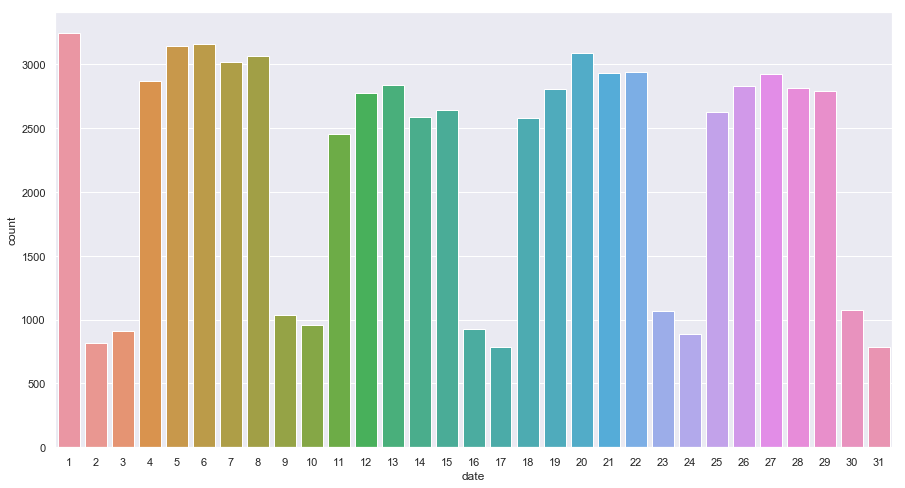

In [92]:
plt.figure(figsize=(15, 8))
p = sns.countplot(x="date", data=data)

In [ ]:
plot = top_ten_retweet.plot(kind='bar', x='username', y='quoted_total_retweet')
plot.set_title('Top 10 user dengan retweet terbanyak', fontsize=15)
plot.set_xlabel('Username', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah retweet', weight='bold', labelpad=15)

plot.tick_params(axis='x', pad=5)

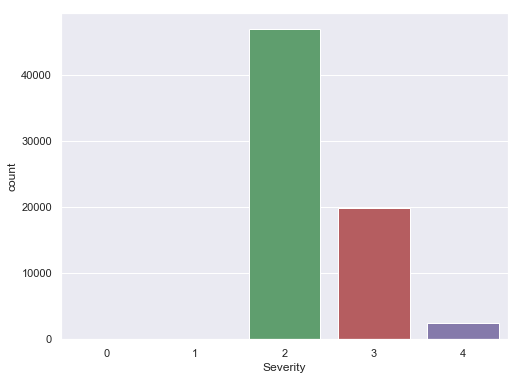

In [87]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Severity", data=data)

In [95]:
data.groupby(['Severity']).count()

,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,date
Severity,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,14,14,14,14,14,14,14,14,14,3,14,14,13,14,7,1,13,14
2,47051,47051,47051,47051,47051,47050,47051,47051,45931,14690,45883,46015,45770,46146,37909,5299,45741,47051
3,19823,19823,19823,19823,19823,19823,19823,19823,19236,6217,19226,19311,19146,19389,16224,2683,19138,19823
4,2492,2492,2492,2492,2492,2492,2492,2492,2396,970,2395,2403,2377,2416,1970,260,2387,2492


In [97]:
data.groupby(['Weather_Condition']).count()

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),date
Weather_Condition,,,,,,,,,,,,,,,,,,
Blowing Snow,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Clear,24233,24233,24233,24233,24233,24233,24232,24233,24233,24161,7238,24152,24217,24188,24233,18734,73,24233
Drizzle,63,63,63,63,63,63,63,63,63,63,24,63,63,63,63,50,7,63
Fog,281,281,281,281,281,281,281,281,281,278,75,277,281,281,281,181,18,281
Hail,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
Haze,649,649,649,649,649,649,649,649,649,645,199,640,649,649,649,497,34,649
Heavy Blowing Snow,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2
Heavy Drizzle,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3
Heavy Rain,198,198,198,198,198,198,198,198,198,198,41,198,198,198,198,178,180,198
